# Chap09 Excercise Olivetti faces dataset

 *Exercise: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
from scipy.io import loadmat

In [4]:
olivetti = fetch_olivetti_faces()

In [5]:
print(olivetti.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [6]:
# olivetti_local =loadmat('../data/olivettifaces.mat')
# olivetti_local.keys()

In [7]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [8]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

 *Exercise: Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.*

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
train_valid_idx,test_idx = next(strat_split.split(olivetti.data,olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [11]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=43)
train_idx,valid_idx = next(strat_split.split(X_train_valid,y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [12]:
# Rethink the stratified sampling here

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape,y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


 To speed things up, we'll reduce the data's dimensionality using PCA:

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(0.99) # 99% of the variance explained, cool
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [15]:
pca.n_components_

199

 *Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).*

In [16]:
from sklearn.cluster import KMeans

In [17]:
k_range =range(5,150,5)
kmeans_per_k = []

for k in k_range:
    print(f"f = {k}")
    kmeans = KMeans(n_clusters=k,random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

f = 5
f = 10
f = 15
f = 20
f = 25
f = 30
f = 35
f = 40
f = 45
f = 50
f = 55
f = 60
f = 65
f = 70
f = 75
f = 80
f = 85
f = 90
f = 95
f = 100
f = 105
f = 110
f = 115
f = 120
f = 125
f = 130
f = 135
f = 140
f = 145


In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_scores = [silhouette_score(X_train_pca,model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

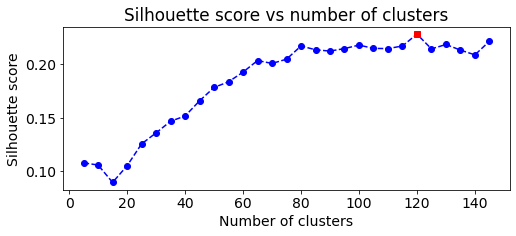

In [20]:
plt.rcParams['font.size'] = 14
_, ax = plt.subplots(figsize=(8,3))

ax.plot(k_range,silhouette_scores,"bo--")
ax.plot(best_k,best_score,"rs")
ax.set(xlabel="Number of clusters",ylabel="Silhouette score",title="Silhouette score vs number of clusters")

plt.show()

In [21]:
best_k

120

 It looks like the best number of clusters is quite high, at 120. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

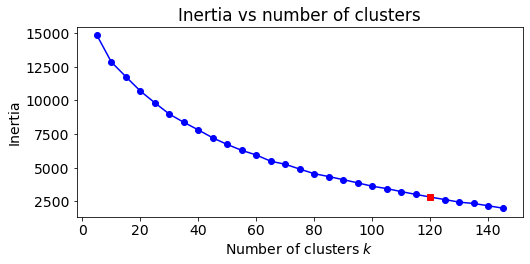

In [22]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

# plt.rcParams['font.size'] = 14

_,ax = plt.subplots(figsize=(8,3.5))

ax.plot(k_range,inertias,"bo-")
ax.plot(best_k,best_inertia,"rs") # bets k with the red dots

ax.set(xlabel="Number of clusters $k$",ylabel="Inertia",title="Inertia vs number of clusters")

plt.show()

 The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [23]:
best_model = kmeans_per_k[best_index]

 *Exercise: Visualize the clusters: do you see similar faces in each cluster?*

Cluster 0


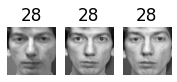

Cluster 1


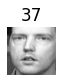

Cluster 2


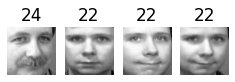

Cluster 3


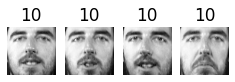

Cluster 4


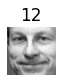

Cluster 5


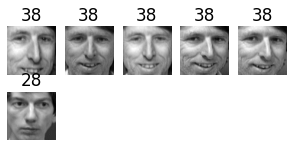

Cluster 6


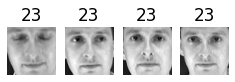

Cluster 7


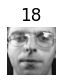

Cluster 8


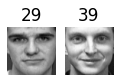

Cluster 9


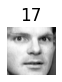

Cluster 10


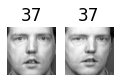

Cluster 11


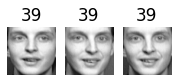

Cluster 12


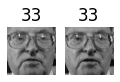

Cluster 13


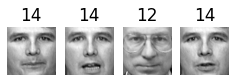

Cluster 14


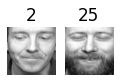

Cluster 15


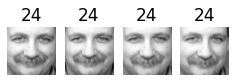

Cluster 16


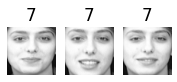

Cluster 17


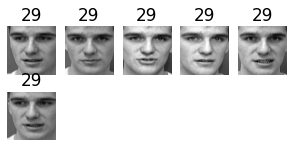

Cluster 18


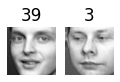

Cluster 19


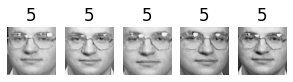

Cluster 20


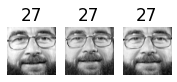

Cluster 21


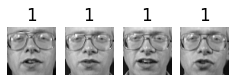

Cluster 22


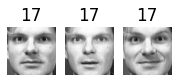

Cluster 23


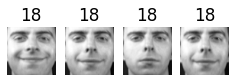

Cluster 24


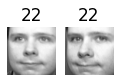

Cluster 25


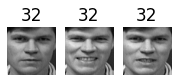

Cluster 26


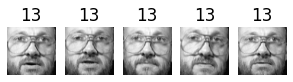

Cluster 27


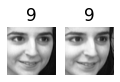

Cluster 28


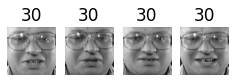

Cluster 29


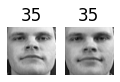

Cluster 30


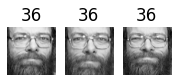

Cluster 31


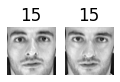

Cluster 32


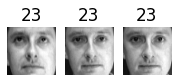

Cluster 33


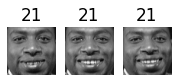

Cluster 34


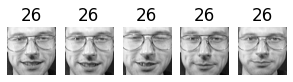

Cluster 35


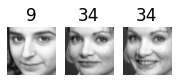

Cluster 36


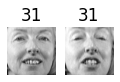

Cluster 37


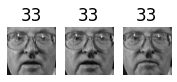

Cluster 38


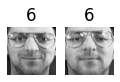

Cluster 39


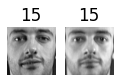

Cluster 40


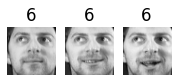

Cluster 41


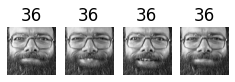

Cluster 42


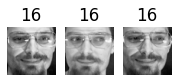

Cluster 43


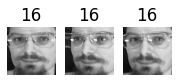

Cluster 44


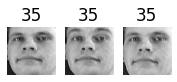

Cluster 45


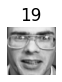

Cluster 46


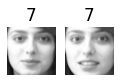

Cluster 47


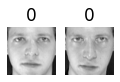

Cluster 48


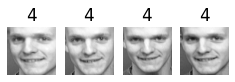

Cluster 49


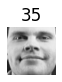

Cluster 50


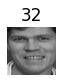

Cluster 51


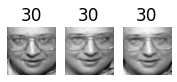

Cluster 52


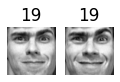

Cluster 53


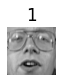

Cluster 54


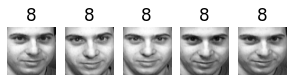

Cluster 55


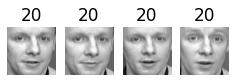

Cluster 56


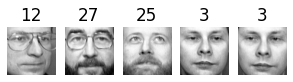

Cluster 57


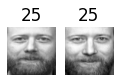

Cluster 58


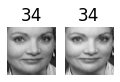

Cluster 59


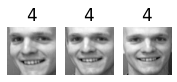

Cluster 60


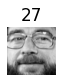

Cluster 61


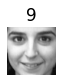

Cluster 62


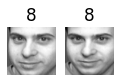

Cluster 63


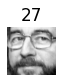

Cluster 64


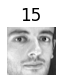

Cluster 65


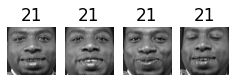

Cluster 66


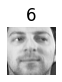

Cluster 67


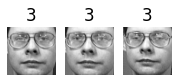

Cluster 68


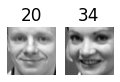

Cluster 69


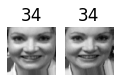

Cluster 70


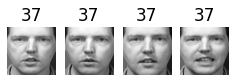

Cluster 71


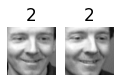

Cluster 72


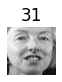

Cluster 73


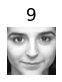

Cluster 74


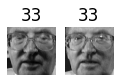

Cluster 75


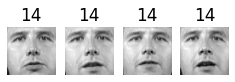

Cluster 76


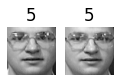

Cluster 77


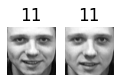

Cluster 78


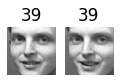

Cluster 79


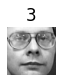

Cluster 80


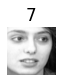

Cluster 81


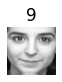

Cluster 82


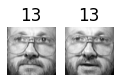

Cluster 83


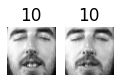

Cluster 84


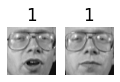

Cluster 85


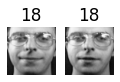

Cluster 86


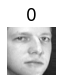

Cluster 87


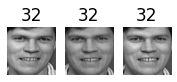

Cluster 88


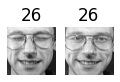

Cluster 89


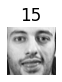

Cluster 90


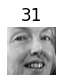

Cluster 91


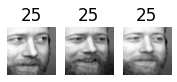

Cluster 92


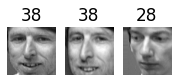

Cluster 93


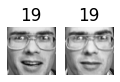

Cluster 94


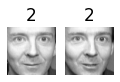

Cluster 95


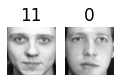

Cluster 96


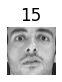

Cluster 97


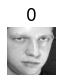

Cluster 98


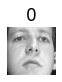

Cluster 99


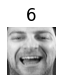

Cluster 100


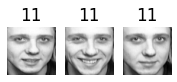

Cluster 101


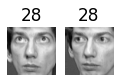

Cluster 102


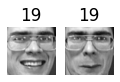

Cluster 103


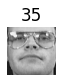

Cluster 104


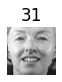

Cluster 105


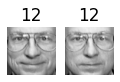

Cluster 106


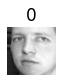

Cluster 107


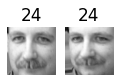

Cluster 108


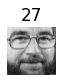

Cluster 109


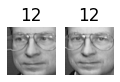

Cluster 110


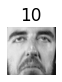

Cluster 111


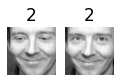

Cluster 112


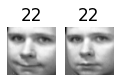

Cluster 113


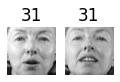

Cluster 114


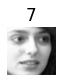

Cluster 115


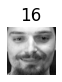

Cluster 116


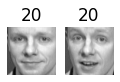

Cluster 117


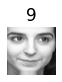

Cluster 118


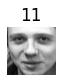

Cluster 119


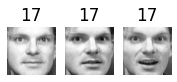

In [24]:
def plot_faces(faces,labels,n_cols=5):
    faces = faces.reshape(-1,64,64)
    n_rows = (len(faces) -1) // n_cols +1 # got it 
    plt.figure(figsize=(n_cols,n_rows * 1.1))
    for index,(face,label) in enumerate(zip(faces,labels)):
        plt.subplot(n_rows,n_cols, index +1)
        plt.imshow(face,cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
        print(f"Cluster {cluster_id}")
        in_cluster = best_model.labels_ == cluster_id
        faces = X_train[in_cluster]
        labels = y_train[in_cluster]
        plot_faces(faces,labels)


 About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

 Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

# Using Clustering as Preprocessing for Classification

 *Exercise: Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.*

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_pca,y_train)
clf.score(X_valid_pca,y_valid)

0.925

 *Exercise: Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.*

In [27]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

cfl = RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_reduced,y_train)

clf.score(X_valid_reduced,y_valid)

0.7

# 12. A Gaussian Mixture Model for the Olivetti Faces Dataset

 *Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
gm =GaussianMixture(n_components=40,random_state=42)
y_pred = gm.fit_predict(X_train_pca)

 *Exercise: Use the model to generate some new faces (using the `sample()` method), and visualize them (if you used PCA, you will need to use its `inverse_transform()` method).*

In [30]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

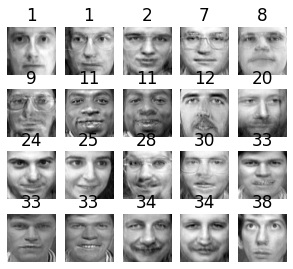

In [31]:
plot_faces(gen_faces,y_gen_faces)

 *Exercise: Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images and for anomalies).*

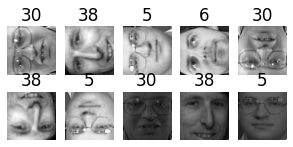

In [32]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1,64,64),axes=[0,2,1])
rotated = rotated.reshape(-1,64 * 64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1,64,64)[:,::-1,:]
flipped = flipped.reshape(-1,64 * 64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:,1:-1] *= 0.3
y_darkened = y_train[:n_darkened]


X_bad_faces = np.r_[rotated,flipped,darkened]
y_bad = np.concatenate([y_rotated,y_flipped,y_darkened])

plot_faces(X_bad_faces,y_bad)

In [33]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [34]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643194e+07, -1.89785002e+07, -3.78112214e+07, -4.98187727e+07,
       -3.20479165e+07, -1.37531287e+07, -2.92374053e+07, -1.05489227e+08,
       -1.19575601e+08, -6.74257886e+07])

 The bad faces are all considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances:

In [35]:
gm.score_samples(X_train_pca[:10])

array([1163.02020898, 1134.0363802 , 1156.32132785, 1170.67602809,
       1141.4540469 , 1154.35205097, 1091.32894386, 1111.41149372,
       1096.43049063, 1132.98982573])

# 13. Using Dimensionality Reduction Techniques for Anomaly Detection

 *Exercise: Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.*

  We already reduced the dataset using PCA earlier:
  

In [36]:
X_train_pca

array([[ 3.78081918e+00, -1.85479116e+00, -5.14403963e+00, ...,
        -1.35627866e-01, -2.14083701e-01,  6.11895509e-02],
       [ 1.01488476e+01, -1.52754509e+00, -7.66973495e-01, ...,
         1.23930454e-01, -1.35264307e-01, -2.32782010e-02],
       [-1.00152922e+01,  2.87729263e+00, -9.19883907e-01, ...,
         7.26116300e-02, -2.96374480e-03,  1.24893233e-01],
       ...,
       [ 2.47586989e+00,  2.95596957e+00,  1.29985714e+00, ...,
        -2.09092237e-02,  3.48546058e-02, -1.54323906e-01],
       [-3.22031641e+00,  5.34897757e+00,  1.39427209e+00, ...,
         5.75542375e-02, -2.28311554e-01,  1.55571803e-01],
       [-9.22876537e-01, -3.64703107e+00,  2.26087952e+00, ...,
         1.36850759e-01, -6.91313371e-02,  6.26817122e-02]], dtype=float32)

In [37]:
def reconstruction_errors(pca,X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed -X).mean(axis=-1)
    return mse

In [38]:
reconstruction_errors(pca,X_train).mean()

0.00019205349

In [39]:
reconstruction_errors(pca,X_bad_faces).mean()

0.004707354

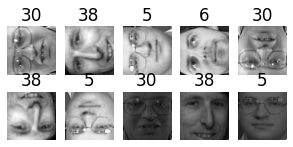

In [40]:
plot_faces(X_bad_faces,y_bad)

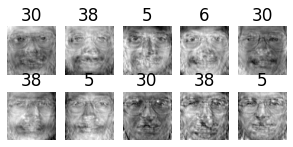

In [41]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed,y_bad)